In [1]:
import fitz  # PyMuPDF for extracting text
from pdf2image import convert_from_path

# Convert each page of the PDF into an image
pdf_path = r'C:\Users\Omen\Downloads\5.3.21.WILM.CO2.P&ID.Compressor.Project.Rev.3 (1).pdf'
pages = convert_from_path(pdf_path, 300)  # Set a high resolution

# Save each page as an image
for i, page in enumerate(pages):
    page.save(f'page_{i}.jpg', 'JPEG')

# Extract text data using PyMuPDF
doc = fitz.open(pdf_path)

# Loop through the pages to extract text
for page_num in range(len(doc)):
    page = doc.load_page(page_num)
    text = page.get_text("text")
    print(f"Text from page {page_num}: {text}")


Text from page 0: CHECK PRINT
PROJECT IN PROGRESS 
REVISION 3.0 
5/3/21 

Text from page 1: PROJECT IN PROGRESS 
REVISION 3.0 
5/3/21 

Text from page 2: CHECK PRINT
PROJECT IN PROGRESS 
REVISION 3.0 
5/3/21 

Text from page 3: PROJECT IN PROGRESS 
REVISION 3.0 
5/3/21 

Text from page 4: CHECK PRINT
PROJECT IN PROGRESS 
REVISION 3.0 
5/3/21 

Text from page 5: I
PROJECT IN PROGRESS 
REVISION 3.0 
5/3/21 

Text from page 6: PROJECT IN PROGRESS 
REVISION 3.0 
5/3/21 

Text from page 7: PROJECT IN PROGRESS 
REVISION 3.0 
5/3/21 

Text from page 8: PROJECT IN PROGRESS 
REVISION 3.0 
5/3/21 

Text from page 9: CHECK PRINT
PROJECT IN PROGRESS 
REVISION 3.0 
5/3/21 

Text from page 10: CHECK PRINT
PROJECT IN PROGRESS 
REVISION 3.0 
5/3/21 

Text from page 11: CHECK PRINT
PROJECT IN PROGRESS 
REVISION 3.0 
5/3/21 

Text from page 12: PROJECT IN PROGRESS 
REVISION 3.0 
5/3/21 

Text from page 13: PROJECT IN PROGRESS 
REVISION 3.0 
5/3/21 

Text from page 14: CHECK PRINT
PROJECT IN PROGRESS 
RE

In [3]:
import fitz  # PyMuPDF for extracting text
from pdf2image import convert_from_path

# Convert each page of the PDF into an image
pdf_path = r'C:\Users\Omen\Downloads\5.3.21.WILM.CO2.P&ID.Compressor.Project.Rev.3 (1).pdf'
pages = convert_from_path(pdf_path, 300)  # Set a high resolution

# Save each page as an image
for i, page in enumerate(pages):
    page.save(f'page_{i}.jpg', 'JPEG')

# Extract text data using PyMuPDF
doc = fitz.open(pdf_path)

# Open a text file to save the extracted text
with open("extracted_text.txt", "w", encoding="utf-8") as text_file:
    # Loop through the pages to extract text
    for page_num in range(len(doc)):
        page = doc.load_page(page_num)
        text = page.get_text("text")
        
        # Write the extracted text to the file, and add a page separator for readability
        text_file.write(f"--- Text from page {page_num} ---\n")
        text_file.write(text + "\n\n")

# Confirm completion
print("Text extraction and saving complete!")


Text extraction and saving complete!


In [7]:
import fitz  # PyMuPDF for extracting text
from pdf2image import convert_from_path
import pytesseract
from PIL import Image

# Path to the tesseract executable (if not in system PATH)
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

# Convert each page of the PDF into an image
pdf_path = r'C:\Users\Omen\Downloads\5.3.21.WILM.CO2.P&ID.Compressor.Project.Rev.3 (1).pdf'
pages = convert_from_path(pdf_path, 300)  # Set a high resolution

# Save each page as an image and perform OCR
with open("extracted_text_with_ocr.txt", "w", encoding="utf-8") as text_file:
    for i, page in enumerate(pages):
        image_path = f'page_{i}.jpg'
        page.save(image_path, 'JPEG')
        
        # Use Tesseract to perform OCR on the saved image
        text = pytesseract.image_to_string(Image.open(image_path))
        
        # Write the extracted text to the file
        text_file.write(f"--- Text from page {i} ---\n")
        text_file.write(text + "\n\n")

# Confirm completion
print("OCR text extraction and saving complete!")


OCR text extraction and saving complete!


In [11]:
import torch
import torchvision
from PIL import Image
import torchvision.transforms as T

# Load the pre-trained Faster R-CNN model (or fine-tuned model)
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()  # Set the model to evaluation mode

# Define image preprocessing steps
transform = T.Compose([T.ToTensor()])

# Load the P&ID image
image_path = r'C:\Users\Omen\Downloads\page_1.jpg'
image = Image.open(image_path)
image_tensor = transform(image).unsqueeze(0)

# Get the predicted bounding boxes
with torch.no_grad():
    predictions = model(image_tensor)

# Filter the predictions (you can set a confidence threshold)
threshold = 0.01
pred_boxes = [box for box, score in zip(predictions[0]['boxes'], predictions[0]['scores']) if score > threshold]

print("Bounding boxes:", pred_boxes)


Bounding boxes: []


In [1]:
import pytesseract
from PIL import Image

# Load the image
image_path = r'C:\Users\Omen\Downloads\page_1.jpg'
img = Image.open(image_path)

# Perform OCR to extract text and bounding boxes
data = pytesseract.image_to_data(img, output_type=pytesseract.Output.DICT)

# Print the recognized text and corresponding bounding boxes
for i in range(len(data['text'])):
    if int(data['conf'][i]) > 60:  # Only keep high-confidence text extractions
        print(f"Text: {data['text'][i]}, Bounding Box: ({data['left'][i]}, {data['top'][i]}, {data['width'][i]}, {data['height'][i]})")


Text: S-118, Bounding Box: (223, 87, 177, 39)
Text: PLANT, Bounding Box: (564, 154, 81, 30)
Text: INLET, Bounding Box: (665, 154, 71, 30)
Text: AIR, Bounding Box: (753, 154, 41, 30)
Text: COOLED, Bounding Box: (814, 154, 105, 30)
Text: CO2, Bounding Box: (940, 154, 53, 30)
Text: INLET, Bounding Box: (1155, 154, 70, 30)
Text: REFRIGERATED, Bounding Box: (1245, 154, 192, 30)
Text: PLANT, Bounding Box: (88, 176, 81, 30)
Text: INLET, Bounding Box: (189, 176, 70, 30)
Text: WATER, Bounding Box: (278, 176, 84, 30)
Text: SEPARATOR, Bounding Box: (383, 176, 152, 30)
Text: COOLER, Bounding Box: (726, 198, 105, 29)
Text: C02, Bounding Box: (1156, 198, 53, 29)
Text: COOLER, Bounding Box: (1230, 198, 105, 29)
Text: OD:, Bounding Box: (228, 250, 28, 15)
Text: 48”, Bounding Box: (283, 249, 30, 17)
Text: MBTU/HR, Bounding Box: (808, 248, 81, 20)
Text: CAPACITY:, Bounding Box: (1097, 250, 82, 15)
Text: 1,302, Bounding Box: (1206, 250, 48, 16)
Text: MBTU/HR, Bounding Box: (1267, 248, 81, 20)
Text: T/T, 

In [5]:
import cv2
from PIL import Image
import pytesseract

# Path to the image
image_path = r'C:\Users\Omen\Downloads\page_1.jpg'

# Load the image using OpenCV
img = cv2.imread(image_path)

# Use pytesseract to extract text and their bounding boxes
ocr_data = pytesseract.image_to_data(img, output_type=pytesseract.Output.DICT)

# Loop through the extracted OCR data
for i in range(len(ocr_data['text'])):
    if int(ocr_data['conf'][i]) > 60:  # Only consider high-confidence text
        x, y, w, h = ocr_data['left'][i], ocr_data['top'][i], ocr_data['width'][i], ocr_data['height'][i]
        text = ocr_data['text'][i]

        # Draw a rectangle around the text
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

        # Put the extracted text near the box (optional)
        cv2.putText(img, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)

# Show the image with bounding boxes
cv2.imshow('Image with Text Bounding Boxes', img)

# Press any key to close the window
cv2.waitKey(0)
cv2.destroyAllWindows()

# Save the image with bounding boxes
cv2.imwrite('output_with_bounding_boxes.jpg', img)


True

In [1]:
import cv2
from PIL import Image
import pytesseract

# Path to the image
image_path = r'C:\Users\Omen\Downloads\page_1.jpg'

# Load the image using OpenCV
img = cv2.imread(image_path)

# Use pytesseract to extract text and their bounding boxes
ocr_data = pytesseract.image_to_data(img, output_type=pytesseract.Output.DICT)

# Loop through the extracted OCR data
for i in range(len(ocr_data['text'])):
    if int(ocr_data['conf'][i]) > 60:  # Only consider high-confidence text
        x, y, w, h = ocr_data['left'][i], ocr_data['top'][i], ocr_data['width'][i], ocr_data['height'][i]
        text = ocr_data['text'][i]

        # Draw a rectangle around the text
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

        # Put the extracted text near the box (optional)
        cv2.putText(img, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)

# Resize the image to a width of 1000 pixels (keeping the aspect ratio)
scale_percent = 1000 / img.shape[1]  # Calculate the scale based on desired width
new_width = 1000
new_height = int(img.shape[0] * scale_percent)
resized_img = cv2.resize(img, (new_width, new_height))

# Show the resized image with bounding boxes
cv2.imshow('Resized Image with Text Bounding Boxes', resized_img)

# Press any key to close the window
cv2.waitKey(0)
cv2.destroyAllWindows()

# Save the resized image with bounding boxes
cv2.imwrite('output_with_bounding_boxes_resized.jpg', resized_img)


True

In [3]:
cv2.imwrite('output_with_bounding_boxes_full.jpg', img)


True

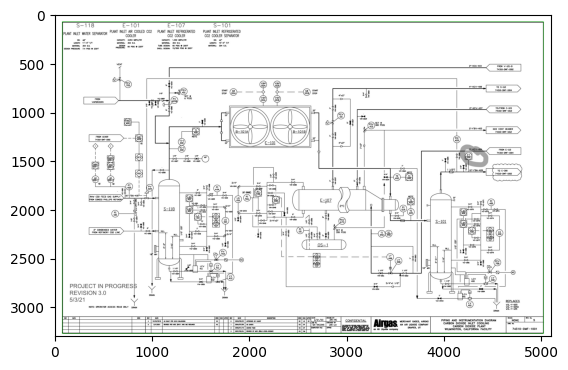

In [5]:
import cv2
from matplotlib import pyplot as plt

# Load the image using OpenCV
img = cv2.imread(r'C:\Users\Omen\Downloads\page_1.jpg', 0)  # Load in grayscale

# Apply Canny Edge Detection
edges = cv2.Canny(img, 100, 200)

# Find contours based on the edges detected
contours, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw the contours on the original image
img_contours = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
cv2.drawContours(img_contours, contours, -1, (0, 255, 0), 2)

# Display the contours
plt.imshow(img_contours)
plt.show()


In [7]:
import pytesseract
import cv2
from PIL import Image

# Load the legend page
legend_image = cv2.imread(r'C:\Users\Omen\Downloads\page_0.jpg')

# Use OCR to extract text (Tesseract)
ocr_data = pytesseract.image_to_data(legend_image, output_type=pytesseract.Output.DICT)

# You can store the text and bounding boxes for symbols
symbol_text_pairs = {}

# Loop over OCR results and match text to corresponding symbols based on bounding boxes
for i, text in enumerate(ocr_data['text']):
    if int(ocr_data['conf'][i]) > 60:  # Confidence threshold for OCR
        x, y, w, h = ocr_data['left'][i], ocr_data['top'][i], ocr_data['width'][i], ocr_data['height'][i]
        symbol_text_pairs[(x, y, w, h)] = text  # Store text with bounding box

# You can now crop symbol regions based on their bounding boxes and store them for comparison


In [25]:
import pytesseract
import cv2
from matplotlib import pyplot as plt

# Load the legend page image
legend_image_path = r'C:\Users\Omen\Downloads\page_0.jpg'  # Replace with your image path
legend_image = cv2.imread(legend_image_path)

# Convert to grayscale
gray_image = cv2.cvtColor(legend_image, cv2.COLOR_BGR2GRAY)

# Apply thresholding to improve contrast
_, threshold_image = cv2.threshold(gray_image, 150, 255, cv2.THRESH_BINARY)

# Use custom OCR configuration (OEM 3 for default engine, PSM 6 for assuming a single block of text)
custom_config = r'--oem 3 --psm 6'
ocr_data = pytesseract.image_to_data(threshold_image, config=custom_config, output_type=pytesseract.Output.DICT)
# You can store the text and bounding boxes for symbols
symbol_text_pairs = {}

# Loop over OCR results and match text to corresponding symbols based on bounding boxes
for i, text in enumerate(ocr_data['text']):
    if int(ocr_data['conf'][i]) > 0.1:  # Confidence threshold for OCR
        x, y, w, h = ocr_data['left'][i], ocr_data['top'][i], ocr_data['width'][i], ocr_data['height'][i]
        symbol_text_pairs[(x, y, w, h)] = text  # Store text with bounding box




In [27]:
import torch
import torchvision
from torchvision.transforms import ToTensor

# Load a new P&ID page
pid_image = Image.open(r'C:\Users\Omen\Downloads\page_2.jpg' )
image_tensor = ToTensor()(pid_image).unsqueeze(0)

# Load pre-trained Faster R-CNN model
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Detect symbols
with torch.no_grad():
    predictions = model(image_tensor)

# Extract bounding boxes of detected symbols
boxes = predictions[0]['boxes']


C:\Users\Omen\AppData\Roaming\Python\Python311\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Omen\AppData\Roaming\Python\Python311\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


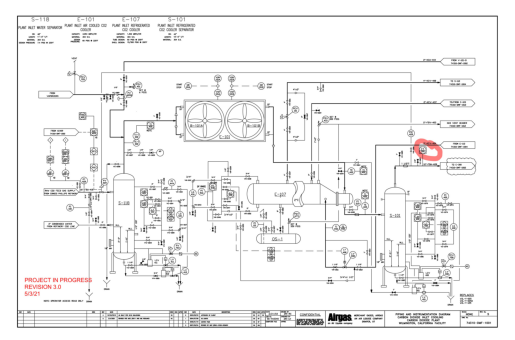

In [35]:
import torch
import torchvision
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import numpy as np  # Add this line to import numpy

# Load a new P&ID page
pid_image_path = r'C:\Users\Omen\Downloads\page_1.jpg'  # Update with your image path
pid_image = Image.open(pid_image_path)

# Convert the image to a tensor
image_tensor = ToTensor()(pid_image).unsqueeze(0)

# Load pre-trained Faster R-CNN model
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Detect symbols
with torch.no_grad():
    predictions = model(image_tensor)

# Extract bounding boxes of detected symbols
boxes = predictions[0]['boxes'].cpu().numpy()  # Convert to NumPy array

# Convert the image to OpenCV format for drawing (RGB to BGR)
pid_image_cv2 = cv2.cvtColor(np.array(pid_image), cv2.COLOR_RGB2BGR)

# Draw bounding boxes on the image
for box in boxes:
    x_min, y_min, x_max, y_max = box
    cv2.rectangle(pid_image_cv2, (int(x_min), int(y_min)), (int(x_max), int(y_max)), (0, 255, 0), 2)

# Convert the image back to RGB for matplotlib
pid_image_rgb = cv2.cvtColor(pid_image_cv2, cv2.COLOR_BGR2RGB)

# Display the image with bounding boxes using matplotlib
plt.imshow(pid_image_rgb)
plt.axis('off')  # Hide axis
plt.show()
